# Part 1: Prepare the Data

In [1]:
import numpy as np
import pandas as pd
import os, warnings
from pathlib import Path

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

from matplotlib import pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
# Import data
file_path = Path("Resources/myopia.csv")
df_myopia = pd.read_csv(file_path)
df_myopia.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
print(len(df_myopia))

618


In [4]:
# Find null values
for column in df_myopia.columns:
    print(f"{column} has {df_myopia[column].isnull().sum()} null values")

AGE has 0 null values
SPHEQ has 0 null values
AL has 0 null values
ACD has 0 null values
LT has 0 null values
VCD has 0 null values
SPORTHR has 0 null values
READHR has 0 null values
COMPHR has 0 null values
STUDYHR has 0 null values
TVHR has 0 null values
DIOPTERHR has 0 null values
MOMMY has 0 null values
DADMY has 0 null values
MYOPIC has 0 null values


In [5]:
# Find duplicate entries
print(f"Duplicate entries: {df_myopia.duplicated().sum()}")

Duplicate entries: 0


In [6]:
new_myopia_df = df_myopia.drop("MYOPIC", axis=1)
labels = df_myopia['MYOPIC']
new_myopia_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [7]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(new_myopia_df)

In [8]:
# View the scaled data
scaled_data

array([[-4.20219106e-01, -1.36391690e+00, -8.92861464e-01, ...,
         4.98303926e-01,  9.87137728e-01,  1.00324150e+00],
       [-4.20219106e-01, -3.08612235e-01, -1.71839800e-01, ...,
        -8.75087555e-01,  9.87137728e-01,  1.00324150e+00],
       [-4.20219106e-01,  6.04386289e-01, -9.97682023e-03, ...,
        -7.50233784e-01, -1.01302987e+00, -9.96768974e-01],
       ...,
       [-4.20219106e-01,  1.65169621e+00,  6.52187361e-01, ...,
        -1.37450264e+00,  9.87137728e-01,  1.00324150e+00],
       [-4.20219106e-01, -2.17472219e-01, -8.48716244e-01, ...,
        -1.88391815e-01, -1.01302987e+00, -9.96768974e-01],
       [-4.20219106e-01,  1.58339808e-03, -3.48415042e-01, ...,
        -7.50233784e-01,  9.87137728e-01,  1.00324150e+00]])

In [9]:
# Create a DataFrame with the transformed data
scaled_myopia_df = pd.DataFrame(scaled_data, columns=new_myopia_df.columns[:14])
scaled_myopia_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,0.987138,1.003241
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,0.987138,1.003241
2,-0.420219,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,-1.013030,-0.996769
3,-0.420219,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,-1.013030,1.003241
4,-1.823978,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,-0.996769


In [10]:
# Save cleaned data
file_path = Path("Resources/myopia_cleaned.csv")
scaled_myopia_df.to_csv(file_path, index=False)

# Part 2: Apply Dimensionality Reduction

In [11]:
# Create the PCA
pca = PCA(n_components=0.90)
pca_transformed_data = pca.fit_transform(scaled_myopia_df)

In [12]:
# Show the data
pca_transformed_data

array([[ 5.35502713e-01,  1.14500427e+00, -1.38501894e+00, ...,
        -1.92299652e+00,  2.67528503e-02,  1.78143856e-01],
       [-6.24705593e-01, -1.57578643e+00, -7.94253057e-01, ...,
         2.85332291e-01,  6.89682613e-01, -5.57030831e-01],
       [-9.33479366e-01, -7.17076224e-01,  8.20149929e-01, ...,
        -3.08170124e-02, -4.31499076e-01,  1.33358217e-02],
       ...,
       [-8.90082017e-01, -2.30800520e+00,  2.68101833e-01, ...,
        -4.89876908e-01,  1.82269069e+00,  8.17765449e-02],
       [-1.12399979e+00,  4.51889784e-01,  1.65865634e-03, ...,
         2.39685015e-01, -1.59282241e+00, -1.01458084e+00],
       [-6.91533913e-01, -7.37046188e-01, -1.05290000e+00, ...,
        -2.73804495e-01,  9.46160724e-01,  4.95797353e-01]])

In [13]:
# Trasform PCA data to a dataframe
myopia_pca_df = pd.DataFrame(data=pca_transformed_data)
myopia_pca_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


In [14]:
# Grab the explained variance
pca.explained_variance_ratio_

array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
       0.06997878, 0.06486986, 0.06377808, 0.05393666, 0.05205566])

In [15]:
# Get the shape of features after reduction
pca_transformed_data.shape

(618, 10)

In [16]:
# Run t-SNE on the principal components
tsne = TSNE(learning_rate=250)
transformed_features = tsne.fit_transform(pca_transformed_data)

In [17]:
# Check that the dimensions have been reduced to two
transformed_features.shape

(618, 2)

In [19]:
# Get the transformed features
myopia_pca_df["x"] = transformed_features[:,0]
myopia_pca_df["y"] = transformed_features[:,1]

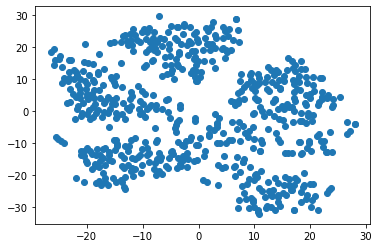

In [21]:
# Create a scatter plot of the data
plt.scatter(myopia_pca_df["x"], myopia_pca_df["y"])
plt.savefig("Images/scatterPlot.png")
plt.show()

### Are there distinct clusters? Looks like there are 5 clusters of data.

# Part 3: Perform a Cluster Analysis with K-means

In [22]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(myopia_pca_df)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,279717.655891
1,2,164351.850746
2,3,105378.558283
3,4,69417.995754
4,5,49183.222195


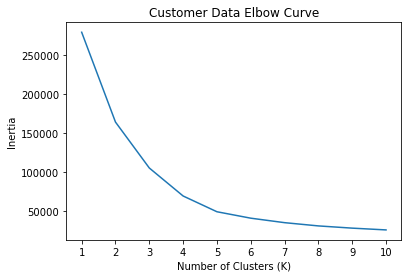

In [23]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Customer Data Elbow Curve')

plt.show()

In [24]:
# Create model when K = 5 (5 looks like the most fitting from the Elbow Curve)
model = KMeans(n_clusters=5, random_state=5)
model

KMeans(n_clusters=5, random_state=5)

In [25]:
# Fit the model with the unlabeled data. 
model.fit(myopia_pca_df)

KMeans(n_clusters=5, random_state=5)

In [26]:
# Get predictions
predictions = model.predict(myopia_pca_df)
print(predictions)

[2 2 3 1 4 1 1 3 3 3 0 2 3 3 4 3 3 4 0 3 1 1 1 0 1 3 2 4 2 4 4 0 2 1 4 2 0
 1 1 1 2 3 0 2 4 1 0 1 4 0 2 1 1 4 1 1 2 0 1 1 1 4 0 1 0 4 3 1 3 3 2 0 0 4
 1 4 3 0 1 3 2 1 4 4 1 2 4 0 4 2 3 3 2 1 1 4 1 2 4 4 0 3 1 3 2 1 3 3 2 1 0
 1 0 0 2 2 3 1 2 1 2 3 2 3 0 2 3 4 2 4 4 1 0 3 2 1 3 4 3 1 4 1 2 1 2 2 1 0
 4 0 4 3 0 0 3 3 4 0 4 4 1 1 2 1 4 0 0 1 4 3 2 2 0 3 4 1 4 2 4 4 1 0 3 4 3
 0 4 2 1 2 2 4 2 1 2 1 3 1 2 4 4 4 1 3 3 2 4 1 2 2 0 4 2 2 4 4 0 1 1 0 2 1
 2 3 3 0 0 0 3 1 0 4 4 0 4 2 2 3 3 3 0 4 3 1 4 1 4 4 0 1 4 0 2 0 4 4 4 4 2
 1 0 3 4 0 2 3 2 0 3 1 1 3 0 0 1 4 1 4 0 2 0 0 2 2 2 4 3 2 1 3 3 1 4 3 0 3
 3 1 3 1 3 2 2 0 4 4 0 3 1 0 4 2 1 2 2 2 4 1 2 0 1 2 2 0 2 3 3 2 3 1 1 2 3
 2 2 3 2 4 1 1 4 1 3 4 4 4 4 0 0 1 3 1 2 3 3 1 2 1 4 3 2 0 3 1 1 2 1 1 3 1
 4 3 3 2 0 2 3 3 2 3 0 2 3 1 2 0 3 0 2 0 4 0 3 2 2 3 3 2 1 3 1 1 4 2 0 0 4
 0 0 0 4 4 2 2 1 3 2 1 3 1 2 0 1 4 2 2 3 2 4 1 0 4 3 3 2 0 4 4 2 0 4 2 3 0
 2 1 1 4 3 0 0 0 2 0 3 0 3 1 2 0 2 1 1 2 0 1 2 0 1 4 4 0 3 4 0 4 4 3 3 0 4
 4 2 0 1 2 3 0 0 0 0 3 3 

In [27]:
# Add a new class column to myopia_pca_df
myopia_pca_df['class']= model.labels_
myopia_pca_df.head()

,0,1,2,3,4,5,6,7,8,9,x,y,class
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,7.212183,-3.428371,2
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,10.832324,8.817731,2
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,-18.572906,2.143478,3
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,-9.831696,13.767660,1
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,-0.768374,-15.750718,4


In [28]:
# Find counts of each class
myopia_pca_df['class'].value_counts()

2    137
4    128
1    120
3    117
0    116
Name: class, dtype: int64

# Recommendation
## Based on the scatter plots and elbow curve, patients should be grouped into 5 clusters. As the elbow curve shows, along with its data, at 5 clusters, the graph is the most flat and would be the best fit to group the patients into 5 clusters.